In [1]:
#import required libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


In [2]:
db=mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="data_for_practice"
)
mycursor=db.cursor()
mycursor.execute("SELECT * from online_sales_data")
output =mycursor.fetchall()
for x in output:
    print(x)

(10001, datetime.date(2024, 1, 1), 'Electronics', 'iPhone 14 Pro', 2, 999.99, 1999.98, 'North America', 'Credit Card')
(10002, datetime.date(2024, 1, 2), 'Home Appliances', 'Dyson V11 Vacuum', 1, 499.99, 499.99, 'Europe', 'PayPal')
(10003, datetime.date(2024, 1, 3), 'Clothing', "Levi's 501 Jeans", 3, 69.99, 209.97, 'Asia', 'Debit Card')
(10004, datetime.date(2024, 1, 4), 'Books', 'The Da Vinci Code', 4, 15.99, 63.96, 'North America', 'Credit Card')
(10005, datetime.date(2024, 1, 5), 'Beauty Products', 'Neutrogena Skincare Set', 1, 89.99, 89.99, 'Europe', 'PayPal')
(10006, datetime.date(2024, 1, 6), 'Sports', 'Wilson Evolution Basketball', 5, 29.99, 149.95, 'Asia', 'Credit Card')
(10007, datetime.date(2024, 1, 7), 'Electronics', 'MacBook Pro 16-inch', 1, 2499.99, 2499.99, 'North America', 'Credit Card')
(10008, datetime.date(2024, 1, 8), 'Home Appliances', 'Blueair Classic 480i', 2, 599.99, 1199.98, 'Europe', 'PayPal')
(10009, datetime.date(2024, 1, 9), 'Clothing', 'Nike Air Force 1', 6

In [3]:
query=""" SELECT * from online_sales_data """
df=pd.read_sql(query,db)

In [4]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
df

,Transaction_ID,order_date,Product_Category,Product Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [6]:
query1="""select Product_Category,sum(Units_Sold) as total_qty,sum(Total_Revenue)as revenue from online_sales_data group by Product_Category"""
df1=pd.read_sql(query1,db)

In [7]:
print(df1)

  Product_Category  total_qty   revenue
0      Electronics       66.0  34982.41
1  Home Appliances       59.0  18646.16
2         Clothing      145.0   8128.93
3            Books      114.0   1861.93
4  Beauty Products       46.0   2621.90
5           Sports       88.0  14326.52


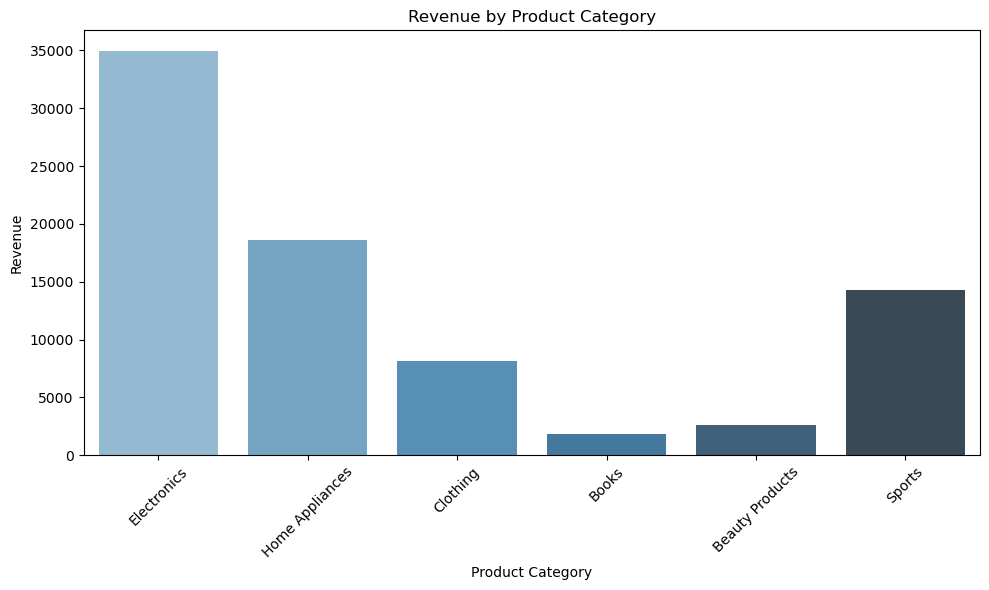

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=df1, x='Product_Category', y='revenue', palette='Blues_d')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Revenue by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()